<h1> US Poverty Rate by State from 1998 to 2018 </h1>

<h2> Poverty rates are extracted from census.gov. <br><br>
Three different maps are created using Choropleth showing poverty rates by state for each year: 1998, 2008 and 2018. <br><br>
A fourth map shows the difference in povery over this 20-year period. </h2>

In [278]:
#!pip install --upgrade pip
!pip install plotly 
!pip install --upgrade nbformat
!pip install --upgrade xlrd
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import pandas as pd
import numpy as np
print('Successfully Imported')

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Requirement already up-to-date: nbformat in /srv/conda/envs/notebook/lib/python3.7/site-packages (5.0.5)
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Requirement already up-to-date: xlrd in /srv/conda/envs/notebook/lib/python3.7/site-packages (1.2.0)
Successfully Imported


In [295]:
df2018 = pd.read_excel('https://www2.census.gov/programs-surveys/cps/tables/pov-46/2019/pov46_weight_10050_1.xls', skip_footer=1, skiprows=9, usecols='A,E')
df2018.columns = ['State', 'Percent2018']
#df2018.State = df2018.State.astype(str)
#df2018 = df2018.astype(str)
df2018.head()

,State,Percent2018
0,United States,11.8
1,Alabama,16.0
2,Alaska,13.1
3,Arizona,12.8
4,Arkansas,15.9


In [296]:
df2008 = pd.read_csv('https://raw.githubusercontent.com/osrow/PovertyMap/master/new46_100125_01.csv')
df2008 = df2008.rename(columns = {'Unnamed: 0':'State', 'Percent':'Percent2008'})
df2008 = df2008[['State','Percent2008']]
#df2008.State = df2008.State.astype(str)
#df2008 = df2008.astype(str)
df2008.head()

,State,Percent2008
0,United States,13.2
1,Alabama,14.3
2,Alaska,8.2
3,Arizona,18.0
4,Arkansas,15.3


In [297]:
df1998 = pd.read_csv('https://raw.githubusercontent.com/osrow/PovertyMap/master/new25_001.csv')
df1998 = df1998.rename(columns = {'Unnamed: 0':'State', 'Percent':'Percent1998'})
df1998 = df1998[['State','Percent1998']]
#df1998 = df1998.astype(str)
df1998.head()

,State,Percent1998
0,United States,12.7
1,Alabama,14.5
2,Alaska,9.4
3,Arizona,16.6
4,Arkansas,14.7


In [266]:
dfst = pd.read_csv('https://raw.githubusercontent.com/osrow/PovertyMap/master/States.csv', sep='\t', header=None)
dfst.columns = ['State', 'ST']
#dfst ['State'] = dfst['State'].str.title()
#dfst.State = dfst.State.astype(str)
dfst['State'] = df1998['State']
#dfst = dfst.astype(str)
dfst.head()

,State,ST
0,United States,US
1,Alabama,AL
2,Alaska,AK
3,Arizona,AZ
4,Arkansas,AR


In [298]:
df = dfst.merge(df1998, on='State', how='outer')
df = df.merge(df2008, on='State', how='outer')
df = df.merge(df2018, on='State', how='outer')
df['Diff'] = df['Percent2018'] - df['Percent1998']
df.head()

,State,ST,Percent1998,Percent2008,Percent2018,Diff
0,United States,US,12.7,13.2,11.8,-0.9
1,Alabama,AL,14.5,14.3,16.0,1.5
2,Alaska,AK,9.4,8.2,13.1,3.7
3,Arizona,AZ,16.6,18.0,12.8,-3.8
4,Arkansas,AR,14.7,15.3,15.9,1.2


<h2> Screenshots </h2>
<img src='https://raw.githubusercontent.com/osrow/PovertyMap/master/map1.png'>


<img src='https://raw.githubusercontent.com/osrow/PovertyMap/master/map2.png'>

<h2> Code </h2>

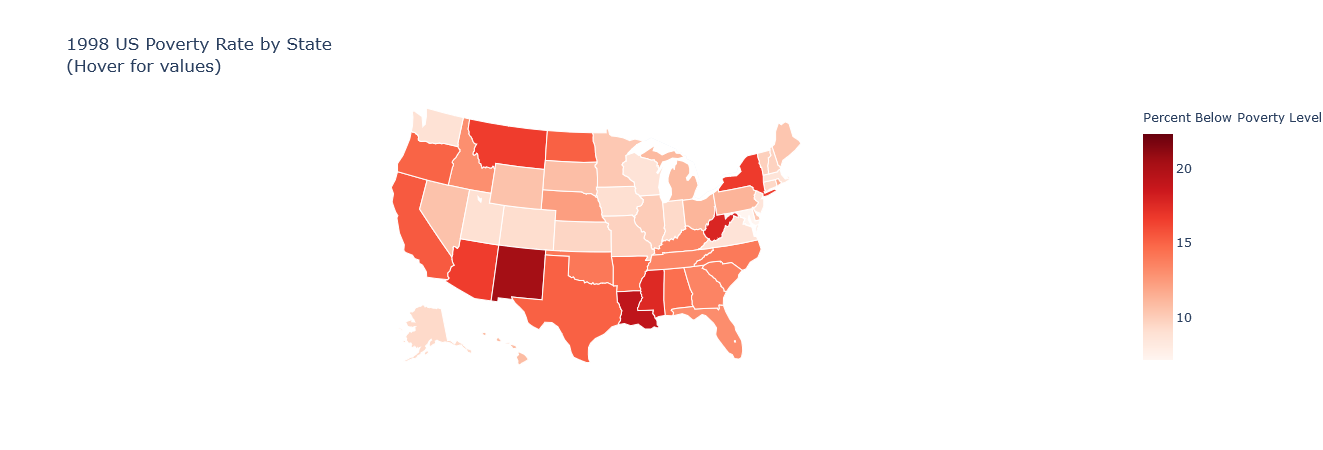

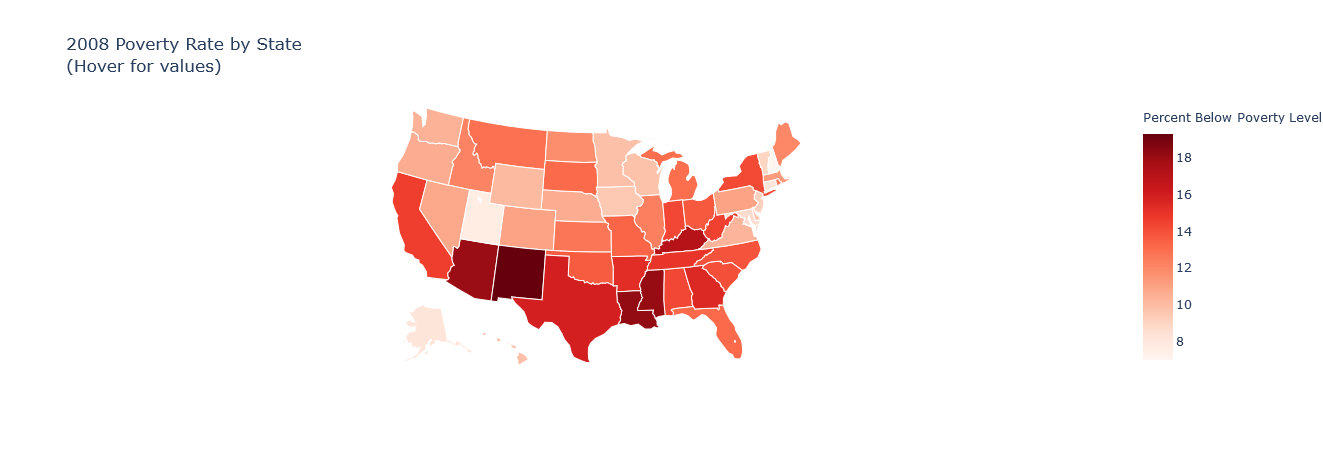

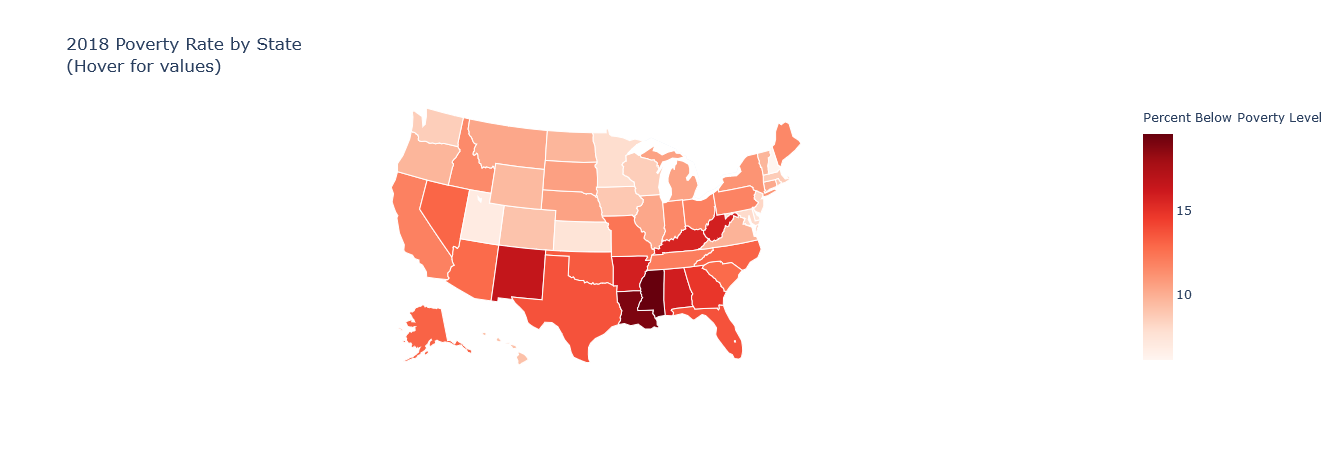

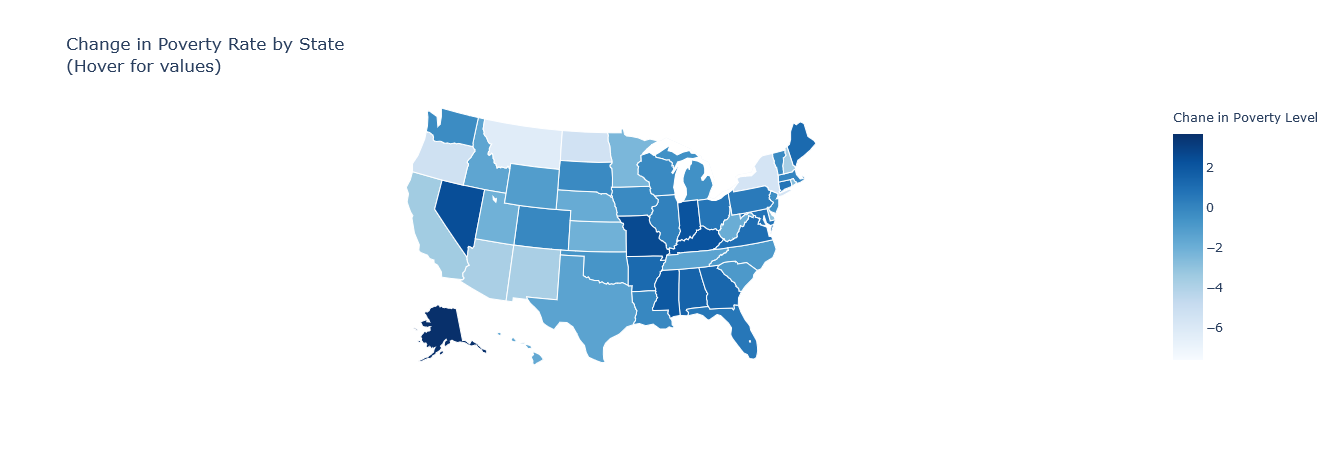

In [294]:
fig = go.Figure(data=go.Choropleth(
    locations=df['ST'],
    z=df['Percent1998'].astype(float),
    locationmode='USA-states',
    colorscale='Reds',
    autocolorscale=False,
    #text=df['Percent1998'], # hover text
    marker_line_color='white', # line markers between states
    colorbar_title="Percent Below Poverty Level"
))

fig.update_layout(
    title_text='1998 US Poverty Rate by State<br>(Hover for values)',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)

fig.show()

fig = go.Figure(data=go.Choropleth(
    locations=df['ST'],
    z=df['Percent2008'].astype(float),
    locationmode='USA-states',
    colorscale='Reds',
    autocolorscale=False,
    #text=df['Percent1998'], # hover text
    marker_line_color='white', # line markers between states
    colorbar_title="Percent Below Poverty Level"
))

fig.update_layout(
    title_text='2008 Poverty Rate by State<br>(Hover for values)',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)

fig.show()

fig = go.Figure(data=go.Choropleth(
    locations=df['ST'],
    z=df['Percent2018'].astype(float),
    locationmode='USA-states',
    colorscale='Reds',
    autocolorscale=False,
    #text=df['Percent1998'], # hover text
    marker_line_color='white', # line markers between states
    colorbar_title="Percent Below Poverty Level"
))

fig.update_layout(
    title_text='2018 Poverty Rate by State<br>(Hover for values)',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)

fig.show()

fig = go.Figure(data=go.Choropleth(
    locations=df['ST'],
    z=df['Diff'].astype(float),
    locationmode='USA-states',
    colorscale='Blues',
    autocolorscale=False,
    #text=df['Percent1998'], # hover text
    marker_line_color='white', # line markers between states
    colorbar_title="Chane in Poverty Level"
))

fig.update_layout(
    title_text='Change in Poverty Rate by State<br>(Hover for values)',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)

fig.show()